In [1]:
##Same as figure 3 but for response prediction metrics

In [2]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [3]:
base_path = '../../../results_metrics_aggregated_bme/response_pred_pcc'

In [4]:
##########
#Mechanistic baselines
##########
performance = {}

paths = glob(osp.join(base_path, 'baseline/within/baseline_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    #Keeps only WITHIN results
    df = df[df['cellline1'] == df['cellline2']]
    
    # Process the new DataFrame to update the dictionary
    method_name = 'Baseline'
    cellline = df['cellline1'].iloc[0]
    
    for topk in [10, 20, 40, 80]:
        for test_cell_line in df['cellline2'].unique():
            dfi = df[df['topk'] == topk]
            dfi = dfi[dfi['cellline2'] == test_cell_line]
            
            metric_data = {
                'R2 - (top {})'.format(topk): [dfi['r2'].mean()],

            }
            
            
            # Initialize nested dictionaries if not already present
            if test_cell_line not in performance:
                performance[test_cell_line] = {}
            
            for metric, value in metric_data.items():
                if metric not in performance[test_cell_line]:
                    performance[test_cell_line][metric] = {}
                if method_name not in performance[test_cell_line][metric]:
                    performance[test_cell_line][metric][method_name] = []
                performance[test_cell_line][metric][method_name] += value



In [5]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/within/biolord_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [6]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'cellOT/within/cellot_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [7]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'chemCPA/within/chemcpa_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [8]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/within/scgen_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [9]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDGrapher/within/pdgrapher_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [10]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [11]:
performance['A375']['R2 - (top 10)'].keys()

dict_keys(['Baseline', 'Biolord', 'CellOT', 'ChemCPA', 'scGen', 'PDGrapher'])

In [12]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

## Panel R2

/tmp/ipykernel_3069813/2942123599.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


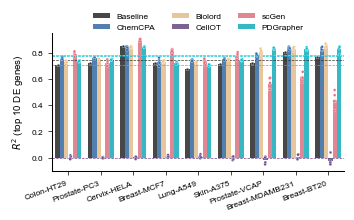

/tmp/ipykernel_3069813/2942123599.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


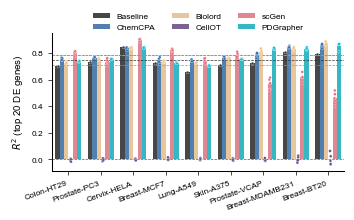

/tmp/ipykernel_3069813/2942123599.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


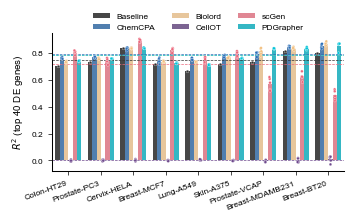

/tmp/ipykernel_3069813/2942123599.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


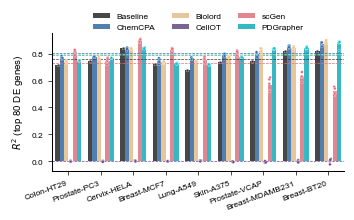

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator
ytitles = {'R2 - (top 10)': ' (top 10 DE genes)', 'R2 - (top 20)': ' (top 20 DE genes)', 'R2 - (top 40)': ' (top 40 DE genes)', 'R2 - (top 80)': ' (top 80 DE genes)'}

for metric in ['R2 - (top 10)', 'R2 - (top 20)', 'R2 - (top 40)', 'R2 - (top 80)']:

    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
    #Rename cell lines
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']
    # Order cell lines based on values for PDGrapher
    pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    ordered_cell_lines = ['Colon-HT29', 'Prostate-PC3', 'Cervix-HELA', 'Breast-MCF7', 'Lung-A549', 'Skin-A375', 'Prostate-VCAP', 'Breast-MDAMB231', 'Breast-BT20'] #Same order as pert prediction

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

    

    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Baseline': '#333333',
        'scGen': '#ED697D'
    }

    # Define the order of methods
    method_order = ['Baseline', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(3.543, 2.19))


        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)






        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        # plt.ylim(-10, 10)

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3, frameon=False, title=None)
        plt.xticks(rotation=20, ha="right")
        plt.subplots_adjust(bottom=0.25, right=0.95)
        plt.ylabel(r'$R^2$' + ytitles[metric])
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()




In [14]:
dfs = []
for metric in ['R2 - (top 20)', 'R2 - (top 40)', 'R2 - (top 80)']:
    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for split_idx, value in enumerate(values, start=1):  # CV split index
                    data.append([cellline, method, split_idx, metric, value])
    
    df = pd.DataFrame(data, columns=['Cell line', 'Method', 'Cross-validation split', 'Metric', 'Value'])
    dfs.append(df)

df_long = pd.concat(dfs, ignore_index=True)

In [15]:
df = df_long.pivot_table(
    index=['Cell line', 'Method', 'Cross-validation split'],
    columns='Metric',
    values='Value'
).reset_index()

df = df[df['Cell line'] != 'HA1E']

In [16]:
dff = df.groupby(['Cell line', 'Method']).apply(
    lambda group: group.loc[group['Cross-validation split'].idxmax()]  # change metric as needed
).reset_index(drop=True)
dff[0:10]


Metric,Cell line,Method,Cross-validation split,R2 - (top 20),R2 - (top 40),R2 - (top 80)
0,A375,Baseline,1,0.711524,0.723355,0.734747
1,A375,Biolord,5,0.755538,0.764763,0.774613
2,A375,CellOT,5,-0.003445,-0.005042,-0.006307
3,A375,ChemCPA,5,0.757260,0.768682,0.781481
4,A375,PDGrapher,5,0.750360,0.761212,0.771953
5,A375,scGen,5,0.796609,0.806134,0.813753
6,A549,Baseline,1,0.660343,0.666468,0.674543
7,A549,Biolord,5,0.724241,0.736410,0.744935
8,A549,CellOT,5,0.005280,0.008646,-0.000949
9,A549,ChemCPA,5,0.737064,0.750141,0.758081


In [17]:
# Load the existing Excel file and append a new sheet
with pd.ExcelWriter(osp.join(outdir, "PDGrapher_Supp_chemical_response_pred_random.xlsx")) as writer:
    df.to_excel(writer, sheet_name="Panel A-C", index=False)